<a href="https://colab.research.google.com/github/Alex212957/Agri/blob/main/ARARI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###For Agricultural Research

In [ ]:

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Optional, for stronger performance

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

Load data

In [ ]:

df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ethiopia_cross boreder_trade_dataset_YTT.xlsx')

In [ ]:
df.head()

,Unnamed: 0,reporting_country,reporting_country_code,border_point,source,source_country_code,destination,destination_country_code,cpcv2,product,...,value_three_years_ago,value_four_years_ago,value_five_years_ago,two_year_average,five_year_average,pct_change_from_one_month_ago,pct_change_from_one_year_ago,pct_change_from_five_year_average,collection_schedule,data_usage_policy
0,24174,Kenya,KE,Moyale,Ethiopia,ET,Kenya,KE,L02111AA,Cattle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Public
1,24175,Kenya,KE,Moyale,Ethiopia,ET,Kenya,KE,L02111AA,Cattle,...,NaN,NaN,NaN,NaN,NaN,294.878049,NaN,NaN,Monthly,Public
2,24979,Ethiopia,ET,Matema,Ethiopia,ET,Sudan,SD,R01704AA,Lentils,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Public
3,6863,Ethiopia,ET,Matema,Ethiopia,ET,Sudan,SD,R01702AA,Broad Beans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Public
4,1516,Ethiopia,ET,Gambella,Ethiopia,ET,South Sudan,SS,R01122AC,Maize Grain (White),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Public


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
reporting_country,0
reporting_country_code,0
border_point,0
source,0
source_country_code,0
destination,0
destination_country_code,0
cpcv2,0
product,740


Remove null value

In [ ]:

# Percentage of missing data
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("🔍 Missing Value Percentage:\n", missing_percent.head(10))

# Optionally drop columns with too many NaNs
df = df.dropna(axis=1, thresh=0.5 * len(df))  # Keep columns with >50% data

# Or drop rows with critical missing values
#df = df.dropna(subset=["value_this_month", "value_last_month"])

🔍 Missing Value Percentage:
 five_year_average                    95.543925
pct_change_from_five_year_average    95.543925
value_five_years_ago                 90.216822
id                                   90.044860
value_four_years_ago                 87.876636
two_year_average                     85.581308
value_three_years_ago                85.495327
value_two_years_ago                  82.512150
value_one_year_ago                   76.871028
pct_change_from_one_year_ago         76.871028
dtype: float64


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
reporting_country,0
reporting_country_code,0
border_point,0
source,0
source_country_code,0
destination,0
destination_country_code,0
cpcv2,0
product,740


In [ ]:
df.shape

(26750, 35)

In [ ]:
df = df.dropna(subset=["product", "destination_fewsnet_region","source_fewsnet_region"])

In [ ]:
df.head()

,Unnamed: 0,reporting_country,reporting_country_code,border_point,source,source_country_code,destination,destination_country_code,cpcv2,product,...,common_unit,common_unit_quantity,reporting_country_geographic_group,reporting_country_fewsnet_region,source_geographic_group,source_fewsnet_region,destination_geographic_group,destination_fewsnet_region,collection_schedule,data_usage_policy
0,24174,Kenya,KE,Moyale,Ethiopia,ET,Kenya,KE,L02111AA,Cattle,...,ea,410.0,Eastern Africa,East Africa,Eastern Africa,East Africa,Eastern Africa,East Africa,Monthly,Public
1,24175,Kenya,KE,Moyale,Ethiopia,ET,Kenya,KE,L02111AA,Cattle,...,ea,1619.0,Eastern Africa,East Africa,Eastern Africa,East Africa,Eastern Africa,East Africa,Monthly,Public
2,24979,Ethiopia,ET,Matema,Ethiopia,ET,Sudan,SD,R01704AA,Lentils,...,kg,40000.0,Eastern Africa,East Africa,Eastern Africa,East Africa,Northern Africa,East Africa,Monthly,Public
3,6863,Ethiopia,ET,Matema,Ethiopia,ET,Sudan,SD,R01702AA,Broad Beans,...,kg,362000.0,Eastern Africa,East Africa,Eastern Africa,East Africa,Northern Africa,East Africa,Monthly,Public
4,1516,Ethiopia,ET,Gambella,Ethiopia,ET,South Sudan,SS,R01122AC,Maize Grain (White),...,kg,590.0,Eastern Africa,East Africa,Eastern Africa,East Africa,Eastern Africa,East Africa,Monthly,Public


##EDA

In [ ]:

# Basic structure
df.info()

# Summary of numeric features
df.describe()

# Check unique values for categorical columns
for col in ['reporting_country', 'source','trade_type', 'destination', 'product', 'common_unit', 'collection_schedule']:
    print(f"🧩 {col} → {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), '\n')

<class 'pandas.core.frame.DataFrame'>
Index: 25709 entries, 0 to 26749
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          25709 non-null  int64  
 1   reporting_country                   25709 non-null  object 
 2   reporting_country_code              25709 non-null  object 
 3   border_point                        25709 non-null  object 
 4   source                              25709 non-null  object 
 5   source_country_code                 25709 non-null  object 
 6   destination                         25709 non-null  object 
 7   destination_country_code            25709 non-null  object 
 8   cpcv2                               25709 non-null  object 
 9   product                             25709 non-null  object 
 10  indicator_name                      25709 non-null  object 
 11  start_date                          25709 non-

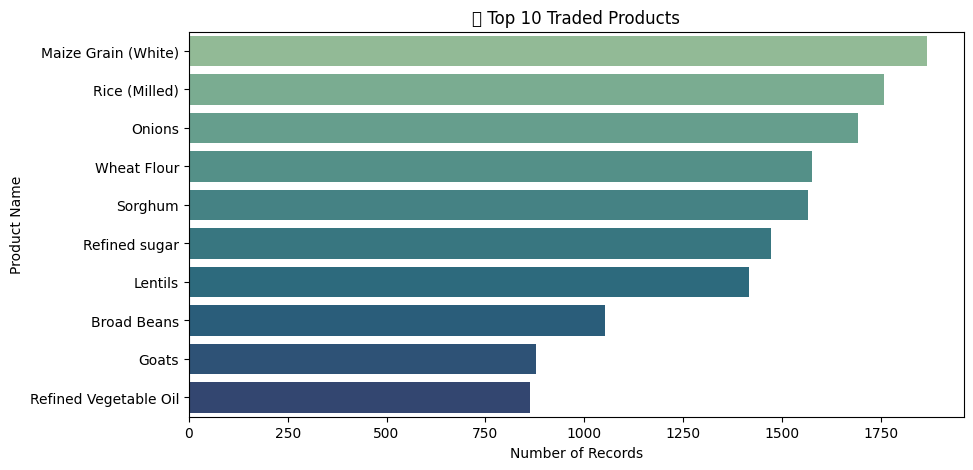

In [ ]:


plt.figure(figsize=(10, 5))
top_products = df['product'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title("🌾 Top 10 Traded Products")
plt.xlabel("Number of Records")
plt.ylabel("Product Name")
plt.show()

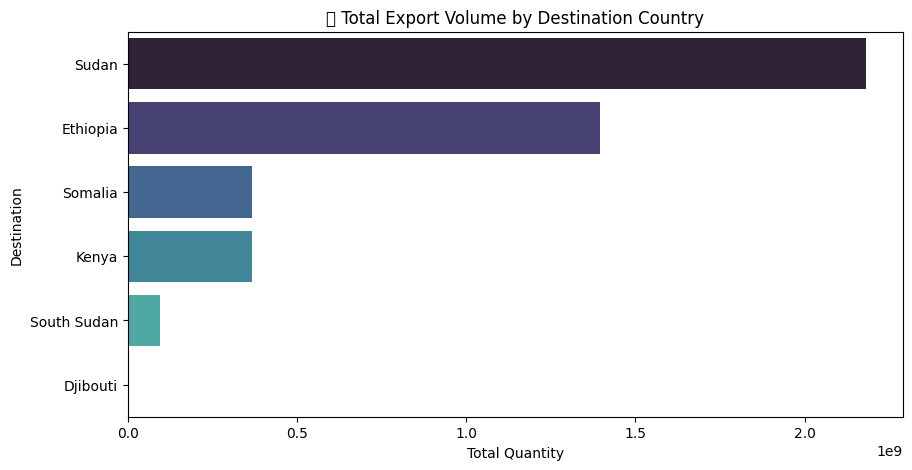

In [ ]:

plt.figure(figsize=(10, 5))
top_countries = df.groupby('destination')['common_unit_quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("🚚 Total Export Volume by Destination Country")
plt.xlabel("Total Quantity")
plt.ylabel("Destination")
plt.show()

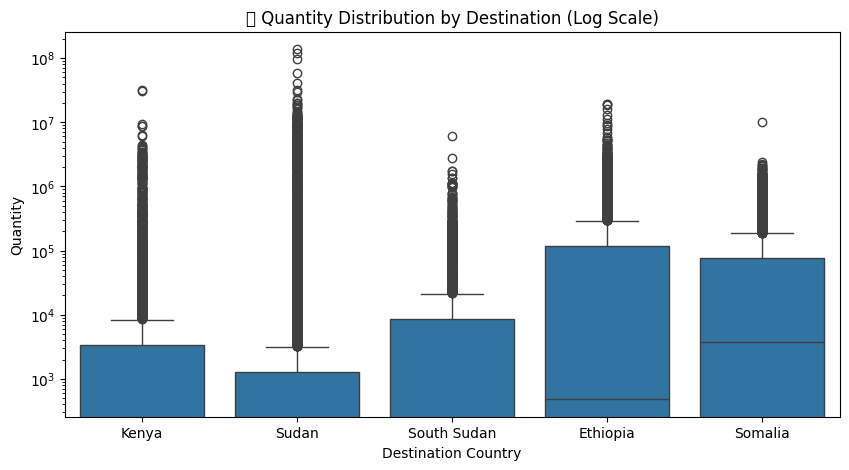

In [ ]:

top_dest = df['destination'].value_counts().head(5).index
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['destination'].isin(top_dest)], x='destination', y='common_unit_quantity')
plt.yscale('log')
plt.title("📦 Quantity Distribution by Destination (Log Scale)")
plt.xlabel("Destination Country")
plt.ylabel("Quantity")
plt.show()

Remove outliers

In [ ]:

Q1 = df['common_unit_quantity'].quantile(0.25)
Q3 = df['common_unit_quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['common_unit_quantity'] >= lower_bound) & (df['common_unit_quantity'] <= upper_bound)]

Encoding variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
le_product = LabelEncoder()
le_destination = LabelEncoder()
le_border = LabelEncoder()
le_reporting = LabelEncoder()
le_source= LabelEncoder()
le_trade=LabelEncoder()

# Apply encoding
df['product_encoded'] = le_product.fit_transform(df['product'])
df['destination_encoded'] = le_destination.fit_transform(df['destination'])
df['border_encoded'] = le_border.fit_transform(df['border_point'])
df['reporting_country_encoded'] = le_reporting.fit_transform(df['reporting_country'])
df['source_encode']=le_source.fit_transform(df['source'])
df['trade_type_encoded']=le_trade.fit_transform(df['trade_type'])

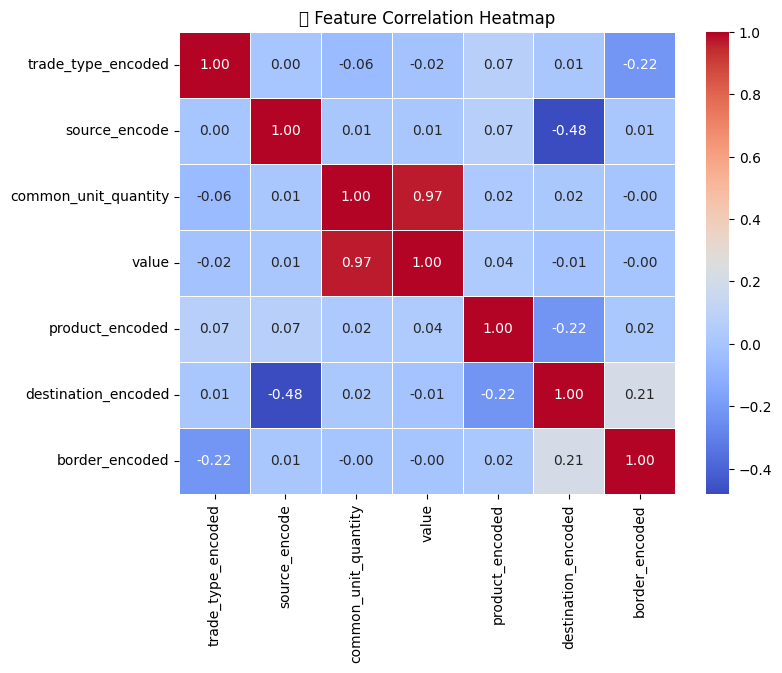

In [ ]:


# Select only numerical/encoded columns for correlation matrix
numeric_cols = ['trade_type_encoded','source_encode','common_unit_quantity', 'value', 'product_encoded', 'destination_encoded', 'border_encoded']

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

In [ ]:

# Define feature matrix (X) and target vector (y)
X = df[['product_encoded','trade_type_encoded' ,'destination_encoded', 'border_encoded','common_unit_quantity' ,'source_encode' ]]
y = df['value']

##Splitting

In [ ]:


# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##Train a model

RF

In [ ]:


# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluation

In [ ]:


# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluation Metrics:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.2f}")

📊 Evaluation Metrics:
MAE: 175.70
MSE: 3506654.72
R²: 0.96


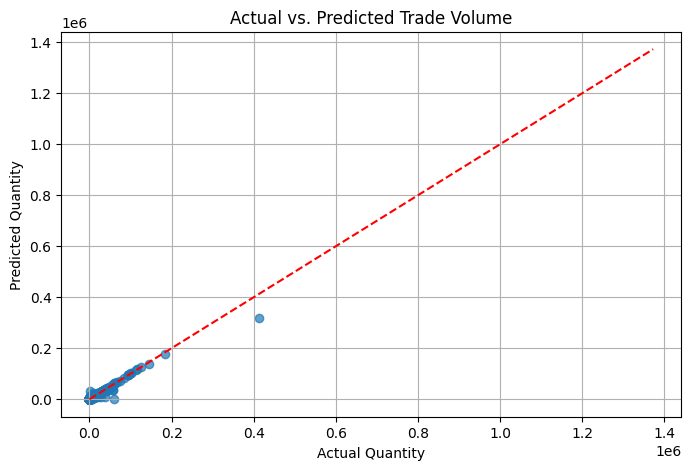

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs. Predicted Trade Volume")
plt.grid(True)
plt.show()

XGBoost

In [ ]:

from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("📊 XGBoost Model Evaluation:")
print(f"➡ MAE: {mae:.2f}")
print(f"➡ RMSE: {rmse:.2f}")
print(f"➡ R² Score: {r2:.2f}")

📊 XGBoost Model Evaluation:
➡ MAE: 492.56
➡ RMSE: 5088.37
➡ R² Score: 0.73


In [ ]:

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Training performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Show results
print("📊 XGBoost Overfitting Check:")
print(f"✅ Train RMSE: {train_rmse:.2f} | R²: {train_r2:.2f}")
print(f"✅ Test  RMSE: {test_rmse:.2f} | R²: {test_r2:.2f}")

📊 XGBoost Overfitting Check:
✅ Train RMSE: 9161.43 | R²: 0.74
✅ Test  RMSE: 5088.37 | R²: 0.73


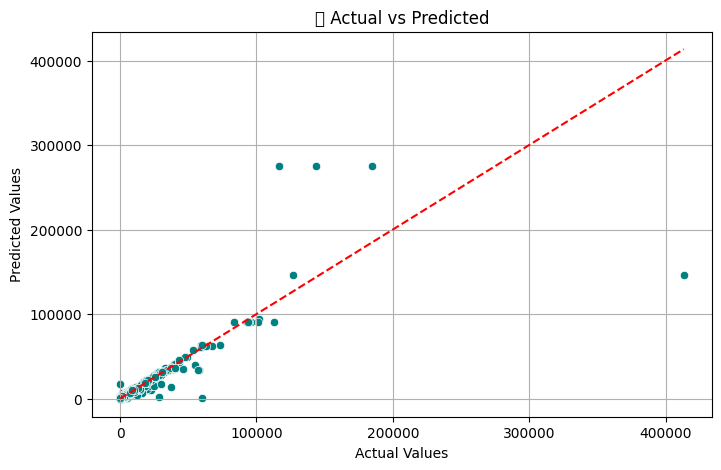

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("📊 Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

##Deployment

In [ ]:
# Install required packages (uncomment this in a Colab environment if necessary)
# !pip install -q gradio

import gradio as gr
import pandas as pd

# Prepare dropdown options from original DataFrame
product_choices = df['product'].unique().tolist()
destination_choices = df['destination'].unique().tolist()
border_choices = df['border_point'].unique().tolist()
source_choices = df['source'].unique().tolist()
trade_type_choices = df['trade_type'].unique().tolist()

# Function to predict trade value
def predict_value(product, destination, border_point, common_unit_quantity, source, trade_type):
    try:
        # Encode the categorical inputs using pre-fitted label encoders
        product_encoded = le_product.transform([product])[0]
        destination_encoded = le_destination.transform([destination])[0]
        border_encoded = le_border.transform([border_point])[0]
        source_encoded = le_source.transform([source])[0]
        trade_type_encoded = le_trade.transform([trade_type])[0]
    except ValueError as e:
        return f"Error encoding input: {e}. Please check if the provided values exist in the training data."

    # Create input DataFrame for prediction
    input_data = pd.DataFrame(
        [[product_encoded, trade_type_encoded, destination_encoded, border_encoded, common_unit_quantity, source_encoded]],
        columns=[
            'product_encoded',
            'trade_type_encoded',
            'destination_encoded',
            'border_encoded',
            'common_unit_quantity',
            'source_encode'
        ]
    )

    # Ensure column order matches training data
    input_data = input_data[[
        'product_encoded',
        'trade_type_encoded',
        'destination_encoded',
        'border_encoded',
        'common_unit_quantity',
        'source_encode'
    ]]


    # Make prediction using the trained model
    predicted_value = xgb_model.predict(input_data)[0]
    return f"Predicted Trade Value: {predicted_value:.2f}"


# Define Gradio interface
iface = gr.Interface(
    fn=predict_value,
    inputs=[
        gr.Dropdown(choices=product_choices, label="Product"),
        gr.Dropdown(choices=destination_choices, label="Destination Country"),
        gr.Dropdown(choices=border_choices, label="Border Point"),
        gr.Number(label="Common Unit Quantity"),
        gr.Dropdown(choices=source_choices, label="Source"),
        gr.Dropdown(choices=trade_type_choices, label="Trade Type"),
    ],
    outputs="text",
    title="Agricultural Trade Value Predictor (XGBoost)",
    description="Predict the trade value based on product, destination, border point, quantity, source, and trade type."
)

# Launch the interface
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cda26b55a7bd7f1312.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
